### Riddler Classic: 

This time, they have identified three planets that circularly orbit a neighboring star. Planet A is three astronomical units away from its star and completes its orbit in three years. Planet B is four astronomical units away from the star and completes its orbit in four years. Finally, Planet C is five astronomical units away from the star and completes its orbit in five years.2
They report their findings to Xiddler’s Grand Minister, along with the auspicious news that all three planets are currently lined up (i.e., they are collinear) with their star. However, the Grand Minister is far more interested in the three planets than the star and wants to know how long it will be until the planets are next aligned.

How many years will it be until the three planets are again collinear (not necessarily including the star)?

### Info We have: 


- Planet A is three astronomical units away from its star and completes its orbit in three years. 
- Planet B is four astronomical units away from the star and completes its orbit in four years. 
- Finally, Planet C is five astronomical units away from the star and completes its orbit in five years

- Origin: At y = 0 all planets are lined up 
- speed: Assuming constant, direction shifts (so technically velocity changes, but doesn't seem pertinent)
- circular orbit

We can assume poistion as (x,y):

$x = r * sin(2 * pi * t/s)$

$y = r * cos(2 * pi * t/s)$

where:
- `r` = units away from star
- `s` = years to complete revolution
- `t` = total time in years

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
# Defining the coordinates over time based on respective speed
def calcX1(r, s, t):
    """Based on radius and speed (years for revolution), use time to determine x1"""
    return round(r*np.cos(2 * np.pi * (t/s)),2)

def calcX2(r, s, t):
    """Based on radius and speed (years for revolution), use time to determine x2"""
    return round(r*np.sin(2 * np.pi * (t/s)),2)

# Finding collinearity
def slopeCalc(planet1, planet2):
    x1, y1 = planet1
    x2, y2 = planet2
    try:
        return round((y2-y1) / (x2 - x1),2)
    except:
        return 999
    
#Three or more points are collinear, if slope of any two pairs of points is same.
def collinearTest(coord_list):
    """No need to compare 1 vs 2, doing 0 v 1 and 0 v 2"""
    if slopeCalc(coord_list[0], coord_list[1]) == slopeCalc(coord_list[0], coord_list[2]):
        return True
    else:
        return False

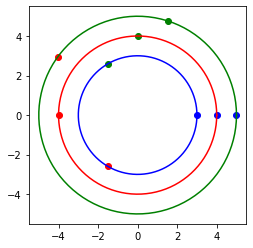

In [3]:
# lets set as 0 - 3 (a full revolution)
t = np.linspace(0, 3, 100)
r = 3
s = 3

# compute x1 and x2
x13 = r*np.cos(2 * np.pi * (t/s))
x23 = r*np.sin(2 * np.pi * (t/s))

# lets set as 0 - 4 (a full revolution)
t = np.linspace(0, 4, 100)
r = 4
s = 4

# compute x1 and x2
x14 = r*np.cos(2 * np.pi * (t/s))
x24 = r*np.sin(2 * np.pi * (t/s))

# and finally biggest circle
t = np.linspace(0, 5, 100)
r = 5
s = 5

# compute x1 and x2
x15 = r*np.cos(2 * np.pi * (t/s))
x25 = r*np.sin(2 * np.pi * (t/s))

# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")
ax.set_aspect(1)

# add some points for t = 0 - 2 
cycol = cycle('bgrcmkyw')

for t in range(3):
    ax.scatter([calcX1(r,r,t) for r in [3,4,5]], [calcX2(r,r,t) for r in [3,4,5]], color = next(cycol)) # start

ax.set_aspect(1)
plt.show()

### Some Tests: 

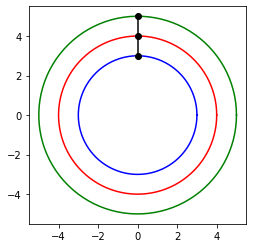

In [4]:
# all on same line -> vertical line 
coord_list = [(0,5), (0,4), (0,3)]
# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")
ax.plot([x[0] for x in coord_list], [x[1] for x in coord_list], 'o-',color = 'black')
ax.set_aspect(1)

# confirm test works 
assert(collinearTest(coord_list) == True)

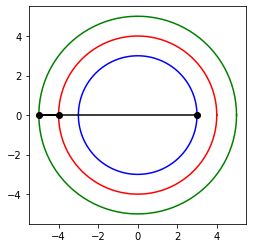

In [5]:
# all on same line -> horizontal line 
coord_list = [(-4,0), (-5,0), (3,0)]

# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")
ax.plot([x[0] for x in coord_list], [x[1] for x in coord_list], 'o-',color = 'black')
ax.set_aspect(1)

# confirm test works 
assert(collinearTest(coord_list) == True)

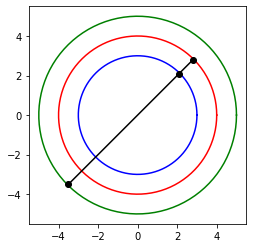

In [6]:
# weirder cases...
coord_list = [(-3.5,-3.5), (2.1,2.1), (2.8,2.8)]

# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")
ax.plot([x[0] for x in coord_list], [x[1] for x in coord_list], 'o-',color = 'black')
ax.set_aspect(1)

# confirm test works 
assert(collinearTest(coord_list) == True)

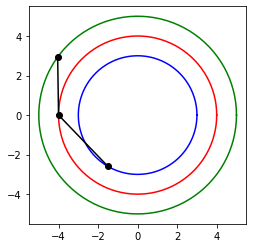

In [7]:
# failures
# two on same line, not other
coord_list = [(-1.5, -2.598), (-4,0), (-4.04508,2.93893)]

# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")
ax.plot([x[0] for x in coord_list], [x[1] for x in coord_list], 'o-', color = 'black')
ax.set_aspect(1)

# confirm test works 
assert(collinearTest(coord_list) == False)

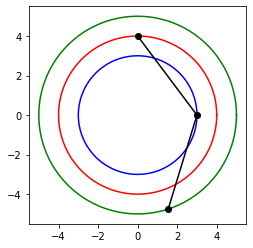

In [8]:
# another failure
coord_list = [(0,4), (3,0),  (1.54508,-4.75528)]

# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")
ax.plot([x[0] for x in coord_list], [x[1] for x in coord_list],'o-', color = 'black')
ax.set_aspect(1)

# confirm test works 
assert(collinearTest(coord_list) == False)

### Testing Logic: 

We should see a match at 30 since this is the lcm -> 3 * 4 * 5. 

Assuming there is something before then, likely not an integer value

In [9]:
### iterate over integer values of t (note, integer might not be the answer...)
rad_list = [3,4,5]
coord_dict = {}
for t in range(31):
    
    # check if x1 are all equal 
    coord_list = []
    for r in rad_list:
        coord_list.append((calcX1(r,r,t), calcX2(r,r,t)))
    
    # find matches
    coord_dict[t] = coord_list
    if collinearTest(coord_list):
        print(f"Found success at time {t}")

Found success at time 0
Found success at time 30


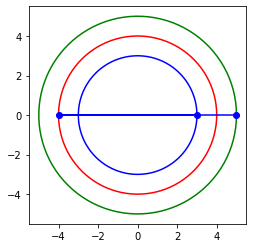

In [10]:
# create the figure for t=30
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")

# generator
cycol = cycle('bgrcmkyw')

for t in [30]:
    ax.plot([calcX1(r,r,t) for r in [3,4,5]], [calcX2(r,r,t) for r in [3,4,5]], 'o-',color = next(cycol))

ax.set_aspect(1)

### Looking closer 

Iterate over .005 values, which is about 200 checks per year. Could also do by `1/365`, but this seems fine. 

In [11]:
### iterate over integer values of t (note, integer might not be the answer...)
rad_list = [3,4,5]

# iterate 1 - 30 years (we know it doesnt happen before 1)
for t in np.arange(1,30.1,0.005):
    
    # check if x1 are all equal 
    coord_list = []
    for r in rad_list:
        coord_list.append((calcX1(r,r,t), calcX2(r,r,t)))
    
    # find matches
    if collinearTest(coord_list):
        print(f"Found success at time {t:.3f}")

<ipython-input-2-c0d085897d27>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return round((y2-y1) / (x2 - x1),2)


Found success at time 7.765
Found success at time 12.280
Found success at time 14.295
Found success at time 14.300
Found success at time 19.730
Found success at time 19.735
Found success at time 19.740
Found success at time 19.745
Found success at time 19.755
Found success at time 19.760
Found success at time 19.765
Found success at time 30.000


### Visual Proof: 

Let's view a few:
- 7.765 ~> 7 years and 279 days
- 12.280 ~> 12 years and 102 days
- 14.295 ~> 14 years and 108 days

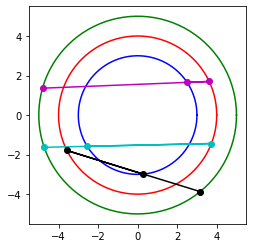

In [12]:
# create the figure
fig, ax = plt.subplots(1)
ax.plot(x13, x23, "blue")
ax.plot(x14, x24, "red")
ax.plot(x15, x25, "green")

# generator
cycol = cycle('cmkyw')

for t in [7.765, 12.280, 14.295]:
    ax.plot([calcX1(r,r,t) for r in [3,4,5]], [calcX2(r,r,t) for r in [3,4,5]], 'o-', color = next(cycol))

ax.set_aspect(1)

In [13]:
# prove slopes are all equal
coord_list = []
t = 7.765
for r in rad_list:
    coord_list.append((calcX1(r,r,t), calcX2(r,r,t)))

print(slopeCalc(coord_list[0], coord_list[1]))
print(slopeCalc(coord_list[0], coord_list[2]))
print(slopeCalc(coord_list[1], coord_list[2]))

0.02
0.02
0.02


### Final Solution: 

7 years, 279 days (7.765 years)